In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sts
import re

In [2]:
df = pd.read_csv('PIB-municipios-BHRP.csv')

In [3]:
df.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Valor adicionado bruto da Indústria a preços correntes (R$ 1.000),Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000),"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)",Valor adicionado bruto total a preços correntes (R$ 1.000),"Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)",Produto Interno Bruto a preços correntes (R$ 1.000),"Produto Interno Bruto per capita a preços correntes (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2002,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"1,442","7,250","8,056","19,333","1,681","21,013","2,786.54",NaN,NaN,NaN
1,2003,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"2,188","9,004","8,428","23,064","2,247","25,311","3,337.03",NaN,NaN,NaN
2,2004,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"2,326","9,438","9,111","24,879","2,435","27,314","3,580.23",NaN,NaN,NaN
3,2005,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"2,797","10,582","10,051","27,271","2,924","30,195","3,935.27",NaN,NaN,NaN
4,2006,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"2,635","9,644","11,168","26,995","2,095","29,090","3,769.58",NaN,NaN,NaN


In [18]:
#Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)
x = df['Valor adicionado bruto da Agropecuária a preços correntes(R$ 1.000)']
y = df['Valor adicionado bruto da Indústria a preços correntes (R$ 1.000)']
z = df['Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)']

x_f = []
y_f = []
z_f = []

for i in x:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    x_f.append(float(i))

for i in y:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    y_f.append(float(i))

for i in z:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    z_f.append(float(i))

In [19]:
#aux = dimensão > 2
aux = []

for i in range(len(x_f)):
    t = []
    t.append(x_f[i])
    t.append(y_f[i])
    t.append(z_f[i])
    aux.append(t)


1 95245429.14060903
2 53162900.177836806
3 32825795.975122653
4 22120421.471802887
5 15793298.353519894
6 11685938.06959777
7 9357526.443041656
8 8481747.369950632
9 7618649.519179637
10 7337558.194886895


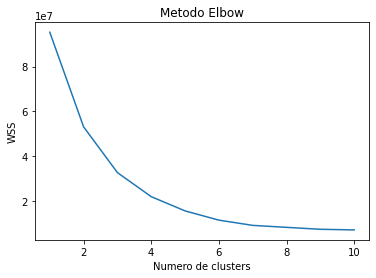

In [26]:
#Método Elbow: Encontrando um valor ideal para o número de clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(aux)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

In [ ]:
#Silhouette Score

In [23]:
#PCA = transforma de n dimensões para uma dimensão m, com n > m

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(aux)


In [41]:
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters
kmeans = KMeans(n_clusters = 3, random_state = 0)
cluster = kmeans.fit_predict(pcaTransformacao)

print(cluster)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 2 2 2 2 0 0 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2
 2 0 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 2 2 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 2 2
 2 2 0 2 2 1 1 1 1 1 1 1 

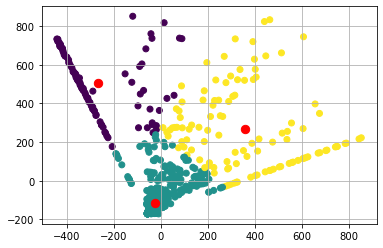

In [47]:
import matplotlib.pyplot as plt

plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=70, c='red') #posicao do centroide do agrupamento
plt.show()

In [43]:
#Pegando os centroides de cada cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[ 505.8975217  -264.97384272]
 [-116.42794985  -23.01474296]
 [ 266.39889834  356.26880329]]


In [45]:
#Mostrar valores separados por cluster

In [ ]:
#Mostrar o nome das cidades por cluster